# Floodplains module

Niche Vlaanderen also contains a module to model the influence of flooding more precisely. This is done using the FloodPlain class. 

The first step is importing the `niche_vlaanderen` module. For convenience, we will be importing as `nv`.

In [1]:
import niche_vlaanderen as nv

## Creating  a Floodplain model
Here the [FloodPlain](https://inbo.github.io/niche_vlaanderen/lowlevel.html#floodplain) class is created. Like in Niche Vlaanderen, when creating the class, the model with its codetables is initialized.

In [2]:
fp = nv.FloodPlain()

## Running the model

The [calculate](https://inbo.github.io/niche_vlaanderen/lowlevel.html#niche_vlaanderen.FloodPlain.calculate) method of the class takes four arguments: the depths (as grid), frequency, period and duration.

In [3]:
fp.calculate(depth_file="../testcase/floodplains/ff_bt_t10_h.asc",
             frequency="T10", period="winter", duration=1)

## Inspecting the model
The results can be plotted per vegetation type. Note that not all vegetation types of Niche are supported by the floodplains module.

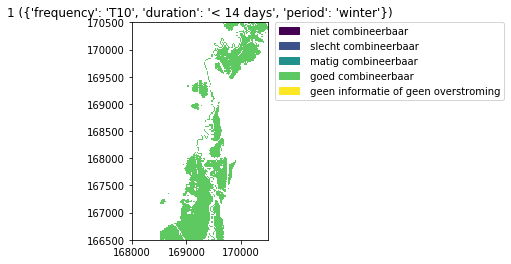

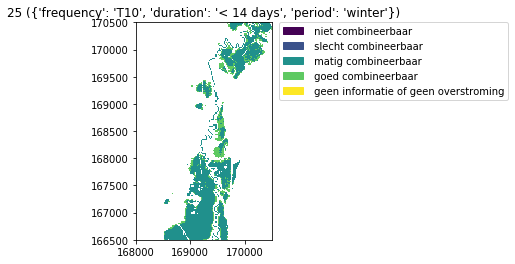

In [4]:
fp.plot(1)
fp.plot(25)
import matplotlib.pyplot as plt
plt.show()

## Saving the model
Comparable to the niche model, the resulting grids can be saved using the [write](https://inbo.github.io/niche_vlaanderen/lowlevel.html#niche_vlaanderen.FloodPlain.write) method.

In [5]:
fp.write("_output")

## Combining the output with niche

The output of a Floodplains model can be combined with a Niche model, by using the [combine](https://inbo.github.io/niche_vlaanderen/lowlevel.html#niche_vlaanderen.FloodPlain.combine) method. 

We will create a new niche model and set the inputs.

In [6]:
myniche = nv.Niche()
input = "../testcase/dijle/"
myniche.set_input("soil_code", input +"bodemv.asc")
myniche.set_input("msw", input +"gvg_0_cm.asc")
myniche.set_input("mlw", input +"glg_0_cm.asc")
myniche.set_input("mhw", input +"ghg_0_cm.asc")
myniche.set_input("seepage", input +"kwel_mm_dag.asc")
 
myniche.set_input("management", input +"beheer_int.asc")

 
myniche.set_input("nitrogen_atmospheric", input +"depositie_def.asc")
myniche.set_input("nitrogen_animal", input +"bemest_dier.asc")
myniche.set_input("nitrogen_fertilizer", input +"bemest_kunst.asc")

myniche.set_input("inundation_vegetation", input +"overstr_veg.asc")
myniche.set_input("inundation_acidity", input +"ovrstr_t10_50.asc")
myniche.set_input("inundation_nutrient", input +"ovrstr_t10_50.asc")
 
myniche.set_input("minerality", input + "minerality.asc")
 
myniche.set_input("rainwater", input +"nulgrid.asc")

Note that the niche model must be run prior to combining - otherwise this will raise an error.

In this example we also plot the result to allow comparison with the combined map.

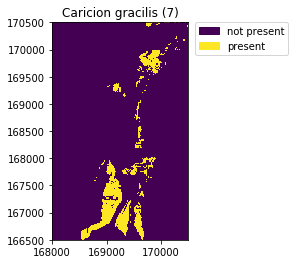

In [10]:
myniche.run()
myniche.plot(7)
plt.show()

Finally, we run the actual [combine](https://inbo.github.io/niche_vlaanderen/lowlevel.html#niche_vlaanderen.FloodPlain.combine) method. The resulting object is a FloodPlains object, so we can use the same method for plotting the results.

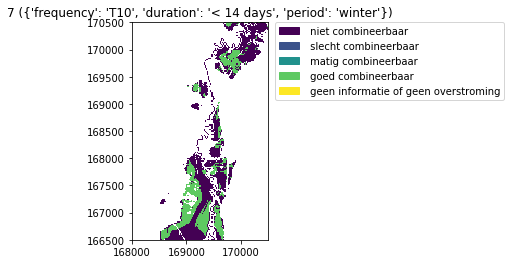

In [13]:
combined = fp.combine(myniche)
combined.plot(7)
plt.show()

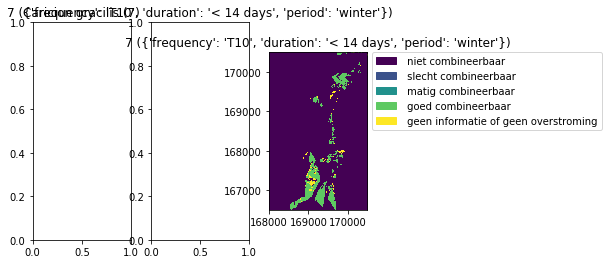

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
myniche.plot(7, ax=ax1)
fp.plot(7, ax=ax2)
combined.plot(7, ax=ax3)
plt.show()